In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')

In [24]:
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/All States All Data Collected.xlsx')
overall_data.head()

,State,code,Medicare Expansion Adoption,% overweight or obese,% Physical Activity,"% Adults, Diabetes","% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000",...,Health Poor,Health Fair,Health Good,Health Very Good,Health Excellent,Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),Poor Mental Health
0,Alabama,AL,Not Adopted,0.697,0.693,0.132,19.2,224.7,170.4,51.5,...,0.072,0.157,0.340,0.286,0.145,0.6168,0.1245,0.1030,0.1557,0.2587
1,Alaska,AK,Adopted,0.642,0.804,0.077,19.1,129.7,141.5,40.0,...,0.043,0.113,0.316,0.313,0.214,0.6462,0.1380,0.1063,0.1095,0.2158
2,Arizona,AZ,Adopted,0.647,0.779,0.097,14.0,136.4,131.9,31.0,...,0.050,0.144,0.315,0.304,0.187,0.6574,0.1227,0.0946,0.1253,0.2199
3,Arkansas,AR,Adopted,0.705,0.690,0.121,22.7,217.4,168.8,41.5,...,0.076,0.171,0.323,0.293,0.137,0.6058,0.1260,0.1082,0.1600,0.2682
4,California,CA,Adopted,0.622,0.790,0.097,11.2,139.7,135.0,37.0,...,0.041,0.140,0.330,0.304,0.185,0.6317,0.1460,0.1083,0.1139,0.2222


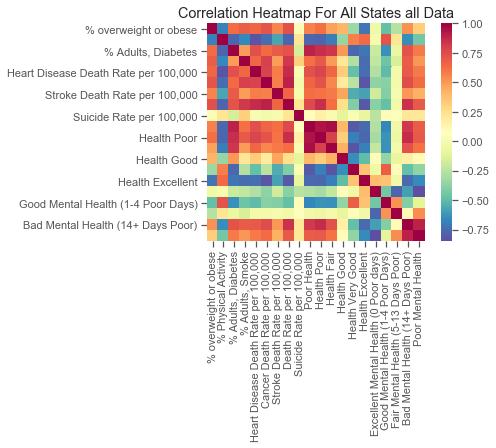

In [25]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)
plt.title('Correlation Heatmap Matrix')

plt.title('Correlation Heatmap For All States all Data')
plt.savefig('Heatmap_all_states_all_data.png')

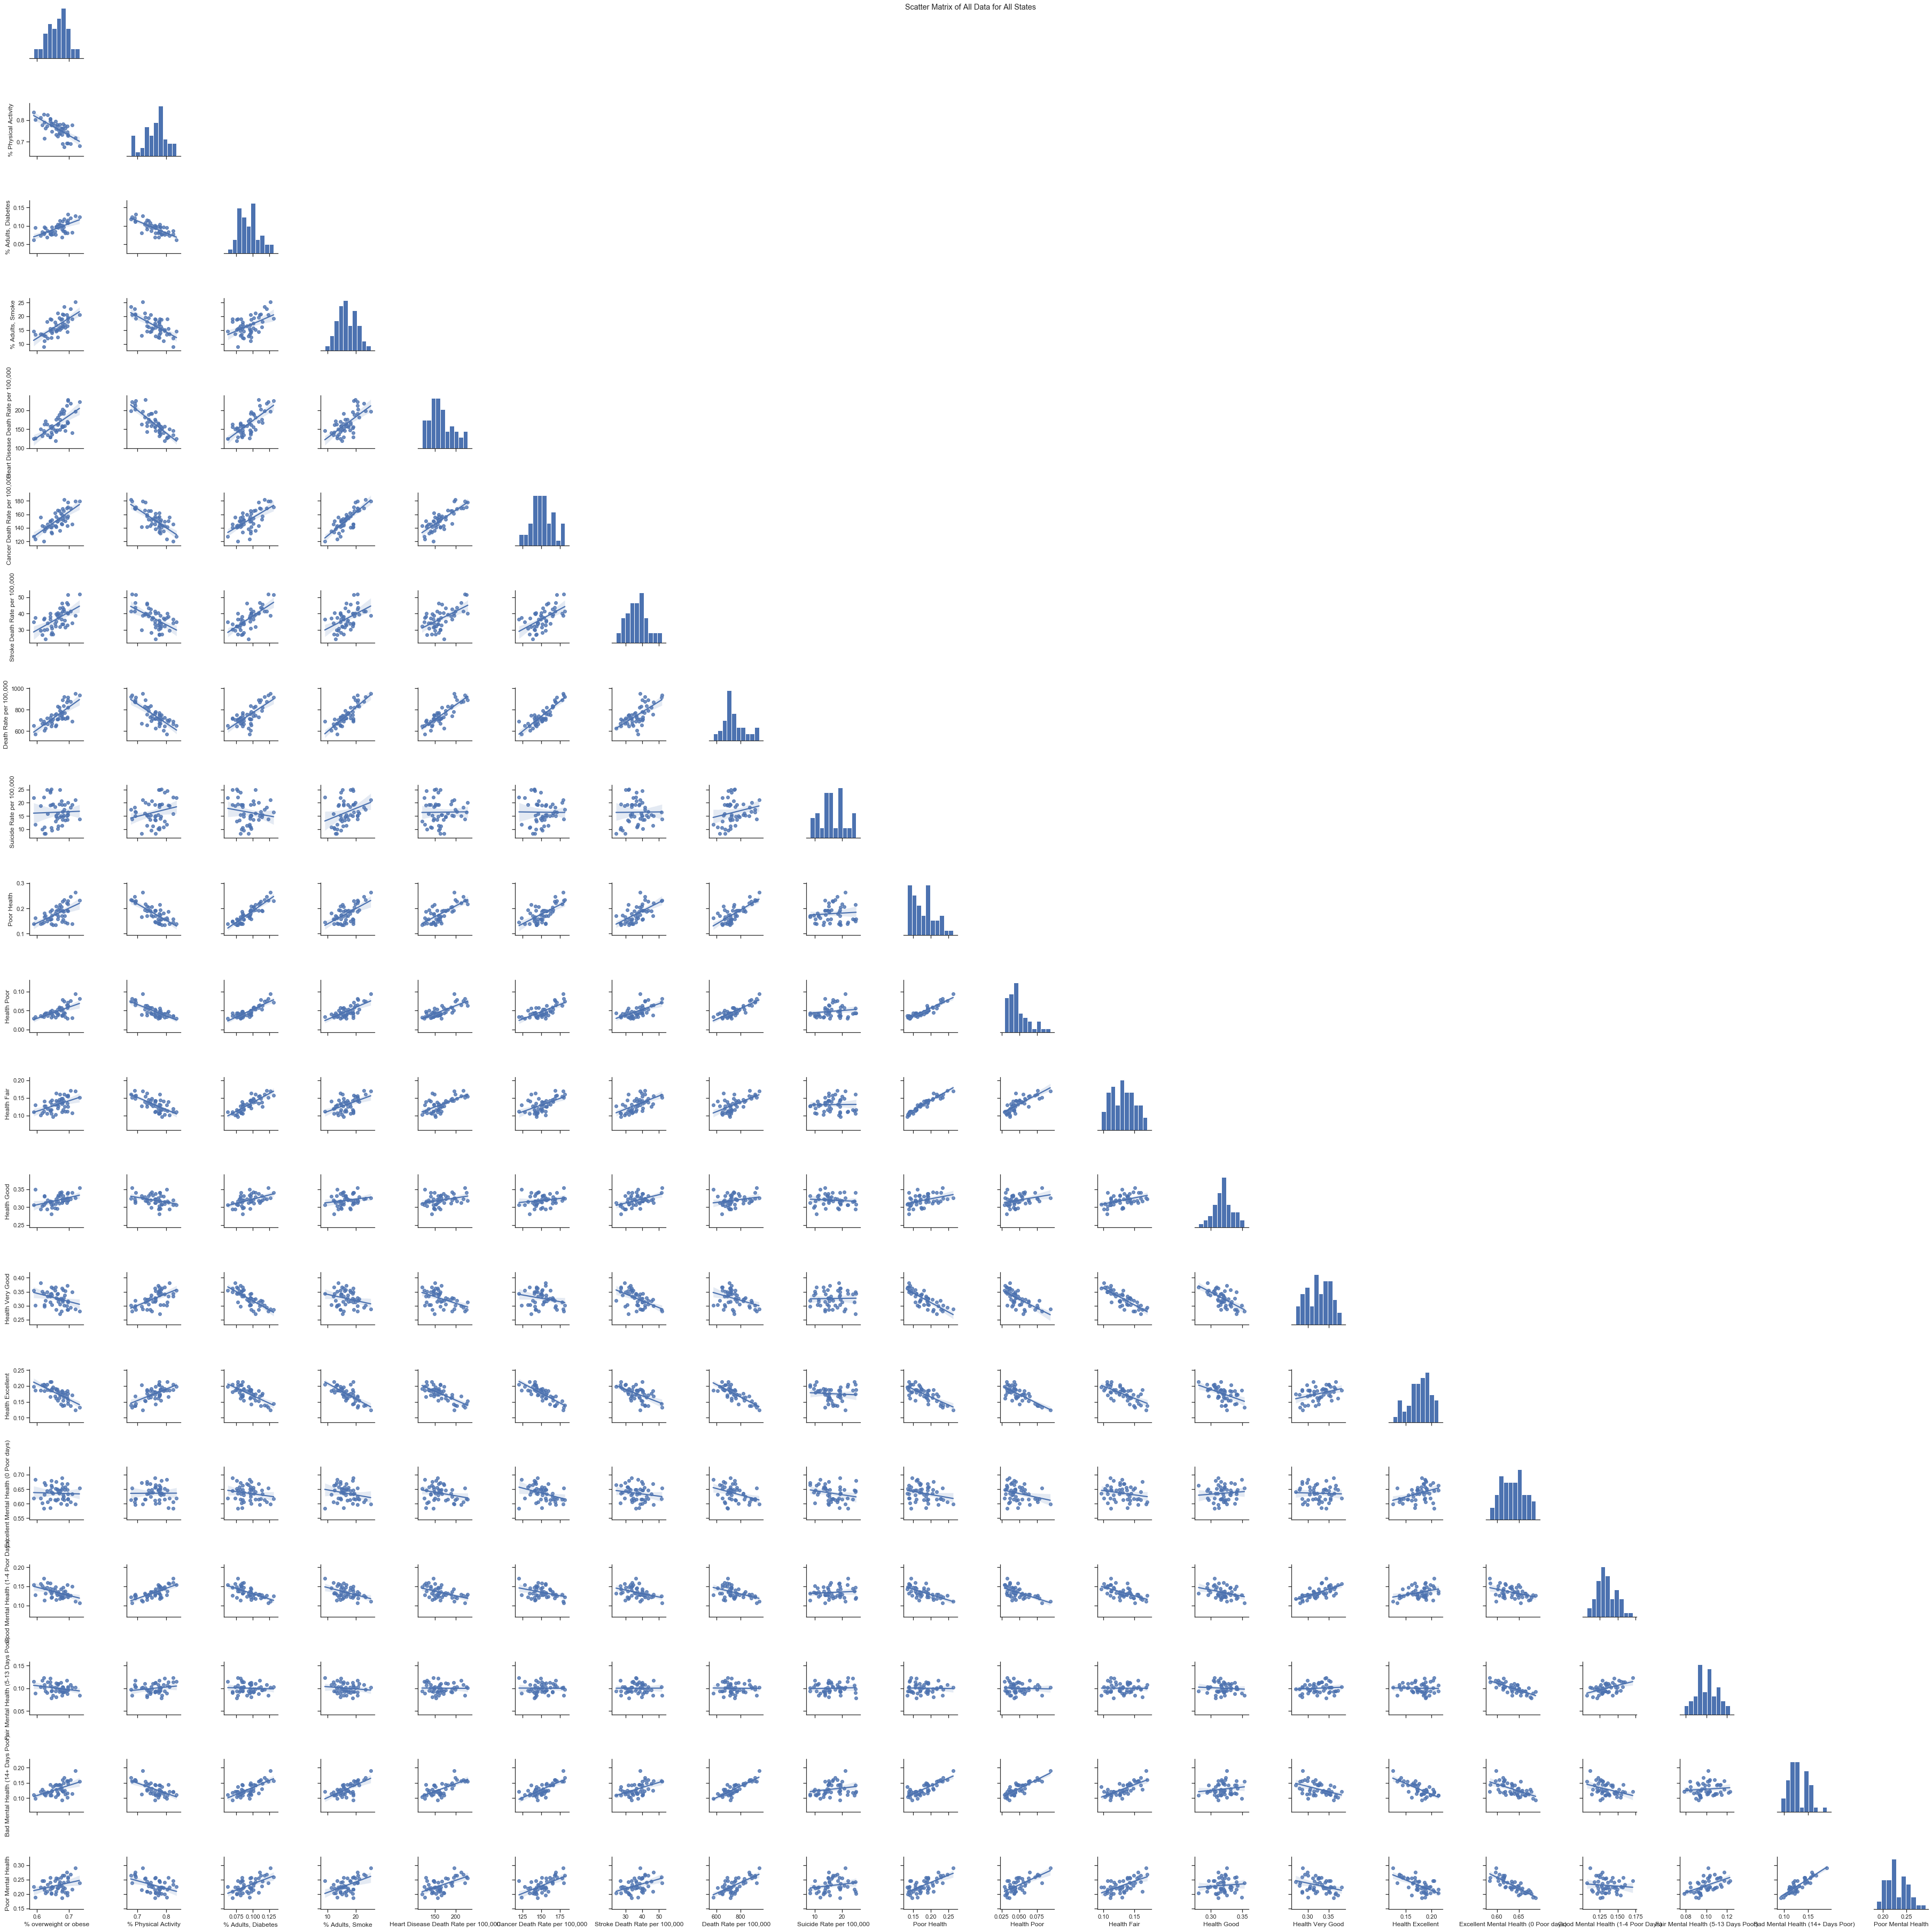

In [26]:

sns.set(style="ticks")

g = sns.pairplot(overall_data, kind = 'reg', corner=True)
g.fig.suptitle("Scatter Matrix of All Data for All States", y=1)
plt.savefig('Scatter_Matrix_all_states_all_data.png')

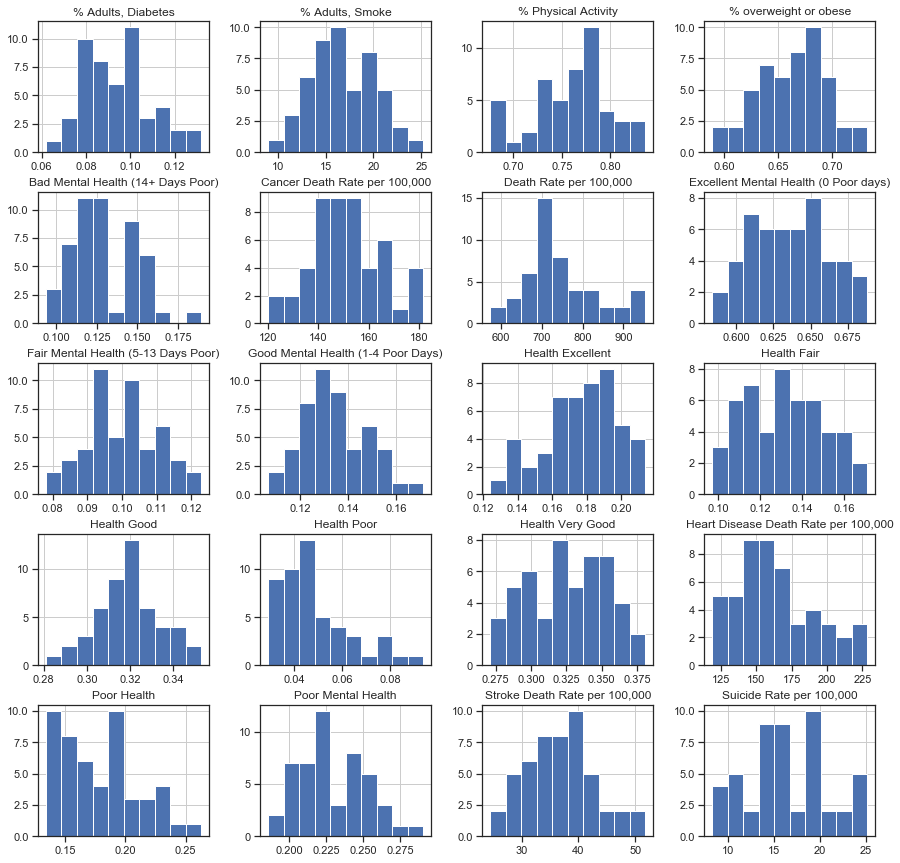

In [27]:
overall_data.hist(figsize = (15,15))
plt.savefig("All_States_All_Data.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa398c00dd0>,
      dtype=object)

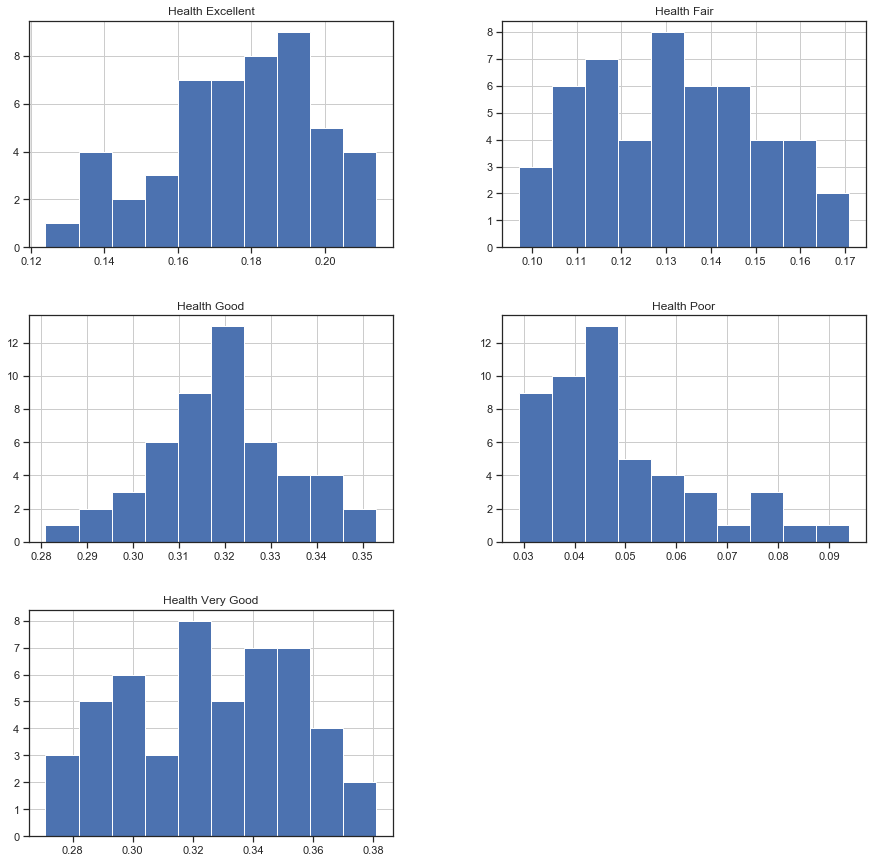

In [28]:
overall_data.loc[:,['Health Poor' ,'Health Fair', 'Health Good', 'Health Very Good', 'Health Excellent']].hist(figsize = (15,15))

In [29]:

overall_data.describe()

,% overweight or obese,% Physical Activity,"% Adults, Diabetes","% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Death Rate per 100,000","Suicide Rate per 100,000",Poor Health,Health Poor,Health Fair,Health Good,Health Very Good,Health Excellent,Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),Poor Mental Health
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.663220,0.759200,0.093940,16.64800,164.296000,151.514000,36.808000,747.468000,16.450000,0.179340,0.048180,0.131160,0.319280,0.325680,0.175660,0.635984,0.134302,0.100204,0.129520,0.229724
std,0.031512,0.038444,0.016182,3.31584,27.927566,14.349216,6.108069,89.540226,4.511674,0.032466,0.014948,0.019202,0.014912,0.027639,0.021536,0.026092,0.013965,0.010608,0.019879,0.023526
min,0.589000,0.676000,0.062000,9.00000,119.000000,120.000000,24.400000,572.500000,8.300000,0.134000,0.029000,0.097000,0.281000,0.271000,0.124000,0.583600,0.106600,0.078100,0.093500,0.185900
25%,0.642500,0.734250,0.081250,14.50000,145.875000,141.975000,32.400000,690.675000,13.700000,0.156000,0.037250,0.113750,0.311250,0.304000,0.163250,0.614850,0.124800,0.092900,0.114325,0.214200
50%,0.665500,0.762000,0.095000,16.25000,158.900000,150.550000,36.800000,723.600000,15.700000,0.173500,0.044000,0.130500,0.319000,0.325500,0.180000,0.637050,0.132450,0.100150,0.123850,0.225100
75%,0.684750,0.781500,0.103500,19.07500,179.550000,160.675000,40.250000,788.225000,19.300000,0.193750,0.055500,0.143750,0.329500,0.348500,0.188750,0.654025,0.144350,0.108125,0.143450,0.245450
max,0.733000,0.836000,0.132000,25.20000,228.500000,181.600000,51.800000,953.800000,25.200000,0.263000,0.094000,0.171000,0.353000,0.381000,0.214000,0.688400,0.171200,0.122900,0.189400,0.290900


Text(0.5, 1.0, '% overweight or obese')

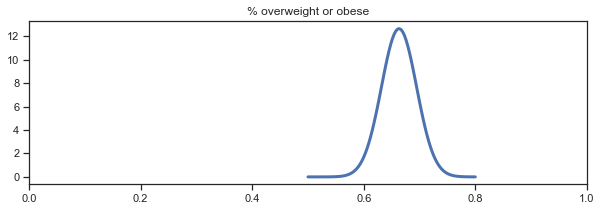

In [33]:
fig, ax = plt.subplots(1, figsize=(10, 3))

difference_in_proportions = stats.norm(0.663220, 0.031512)
#overall_data.loc["% overweight or obese"].hist()
x = np.linspace(.5, .8, num=100)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(0, 1)
ax.set_title("% overweight or obese")

In [58]:
adopted = overall_data.groupby('Medicare Expansion Adoption')
adopted.describe()

% overweight or obese                             \
                                            count      mean       std    min   
Medicare Expansion Adoption                                                    
Adopted                                      31.0  0.655613  0.032947  0.589   
Adopted, not implemented                      6.0  0.661167  0.028386  0.621   
Not Adopted                                  13.0  0.682308  0.021422  0.644   

                                                          % Physical Activity  \
                                25%    50%     75%    max               count   
Medicare Expansion Adoption                                                     
Adopted                      0.6325  0.658  0.6770  0.720                31.0   
Adopted, not implemented     0.6450  0.660  0.6825  0.696                 6.0   
Not Adopted                  0.6720  0.680  0.6950  0.733                13.0   

                                       ... Bad Mental Health (14+ Days Poor)  \
                                 mean  ...                               75%   
Medicare Expansion Adoption            ...                                     
Adopted                      0.764000  ...                           0.14325   
Adopted, not implemented     0.777500  ...                           0.13785   
Not Adopted                  0.739308  ...                           0.14800   

                                    Poor Mental Health                      \
                                max              count      mean       std   
Medicare Expansion Adoption                                                  
Adopted                      0.1894               31.0  0.230574  0.024872   
Adopted, not implemented     0.1544                6.0  0.235450  0.018894   
Not Adopted                  0.1600               13.0  0.225054  0.022863   

                                                                        
                                min      25%      50%      75%     max  
Medicare Expansion Adoption                                             
Adopted                      0.1890  0.21485  0.22440  0.24930  0.2909  
Adopted, not implemented     0.2047  0.22590  0.24295  0.24545  0.2556  
Not Adopted                  0.1859  0.20870  0.22380  0.23870  0.2634  

[3 rows x 160 columns]

In [44]:


plt.figure(figsize=(10,7))
sns.distplot(overall_data.loc[:,"% overweight or obese"])
sns.distplot(overall_data.loc[:,"% overweight or obese"].groupby('Medicare Expansion Adoption'), color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();

ValueError: expr must be a string to be evaluated, <class 'bool'> given